# Electric_Vehicle_Population_Data_Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

In [4]:
import warnings
warnings.filterwarnings('ignore')

Certainly! Let's go through each column in the "Electric_Vehicle_Population_Data.csv" dataset and explain its purpose:

1. **VIN (1-10)**: This column contains the first 10 characters of the Vehicle Identification Number (VIN) for each electric vehicle. The VIN is a unique identifier for a vehicle, and the first 10 characters can provide information about the vehicle's manufacturer, model, and other details.

2. **County**: This column indicates the county where the electric vehicle is registered or located.

3. **City**: This column specifies the city where the electric vehicle is registered or located.

4. **State**: This column indicates the state where the electric vehicle is registered or located.

5. **Postal Code**: This column provides the postal code (zip code) for the location of the electric vehicle.

6. **Model Year**: This column shows the model year of the electric vehicle.

7. **Make**: This column identifies the manufacturer of the electric vehicle.

8. **Model**: This column specifies the model name of the electric vehicle.

9. **Electric Vehicle Type**: This column categorizes the electric vehicle as either a Battery Electric Vehicle (BEV) or a Plug-in Hybrid Electric Vehicle (PHEV).

10. **Clean Alternative Fuel Vehicle (CAFV) Eligibility**: This column indicates whether the electric vehicle is eligible for Clean Alternative Fuel Vehicle incentives or not.

11. **Electric Range**: This column provides the estimated electric range of the vehicle in miles. This is an important factor for BEVs, as it determines the distance the vehicle can travel on a single charge.

12. **Base MSRP**: This column shows the Manufacturer's Suggested Retail Price (MSRP) for the base model of the electric vehicle.

13. **Legislative District**: This column specifies the legislative district associated with the location of the electric vehicle.

14. **DOL Vehicle ID**: This column contains a unique identifier for the vehicle, likely assigned by the Department of Licensing (DOL).

15. **Vehicle Location**: This column provides the geographic coordinates (latitude and longitude) of the vehicle's location in the format "POINT (-122.30839 47.610365)".

16. **Electric Utility**: This column identifies the electric utility company that provides service to the location of the electric vehicle.

17. **2020 Census Tract**: This column specifies the census tract associated with the location of the electric vehicle, based on the 2020 census data.

This dataset provides a wealth of information that can be used to analyze the electric vehicle market, understand adoption patterns, and identify potential business opportunities. The geographical, vehicle, and utility-related data can be leveraged to gain insights into the EV ecosystem and support strategic decision-making.

In [5]:
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
data.head(4)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [6]:
data.shape

(177866, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [8]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [9]:
data=data.dropna()

In [10]:
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [11]:
data.shape

(177473, 17)

In [12]:
for column in data.columns:
    print(f"Unique values in column '{column}':")
    print(data[column].unique())
    print()

Unique values in column 'VIN (1-10)':
['5YJYGDEE1L' '7SAYGDEE9P' '5YJSA1E4XK' ... 'YV4BR00Z6N' '1C4RJYE62P'
 'WMEFK9BA7J']

Unique values in column 'County':
['King' 'Snohomish' 'Kitsap' 'Thurston' 'Yakima' 'Island' 'Chelan'
 'Skagit' 'Spokane' 'Walla Walla' 'Grant' 'Stevens' 'Whitman' 'Kittitas'
 'Pend Oreille' 'Clark' 'Cowlitz' 'Jefferson' 'Clallam' 'Klickitat'
 'Pierce' 'Grays Harbor' 'Whatcom' 'Skamania' 'Wahkiakum' 'Benton'
 'Franklin' 'Lewis' 'San Juan' 'Mason' 'Okanogan' 'Douglas' 'Adams'
 'Pacific' 'Asotin' 'Columbia' 'Lincoln' 'Ferry' 'Garfield']

Unique values in column 'City':
['Seattle' 'Bothell' 'Issaquah' 'Suquamish' 'Yelm' 'Yakima' 'Port Orchard'
 'Auburn' 'Bainbridge Island' 'Lynnwood' 'Olympia' 'Renton' 'Tenino'
 'Lacey' 'Brier' 'Shoreline' 'Rochester' 'Coupeville' 'Marysville'
 'Pacific' 'Everett' 'Edmonds' 'Wenatchee' 'Kingston' 'Mukilteo'
 'Anacortes' 'Bremerton' 'Snohomish' 'Spokane' 'Oak Harbor' 'Walla Walla'
 'Mill Creek' 'Moses Lake' 'Ephrata' 'Monroe' 'Moxee' '

For the task of market size of electric vehicles analysis, we can explore the following areas:

1. **EV Adoption Over Time**: Analyze the growth of the EV population by model year.
2. **Geographical Distribution**: Understand where EVs are most commonly registered (e.g., by county or city).
3. **EV Types**: Breakdown of the dataset by electric vehicle type (BEV, etc.).
4. **Make and Model Popularity**: Identify the most popular makes and models among the registered EVs.
5. **Electric Range Analysis**: Analyze the electric range of vehicles to see how EV technology is progressing.
6. **Estimated Growth in Market Size**: Analyze and find the estimated growth in the market size of electric vehicles.hicles.

**Let’s start with analyzing the EV Adoption Over Time by visualizing the number of EVs registered by model year. It will give us an insight into how the EV population has grown over the years:**

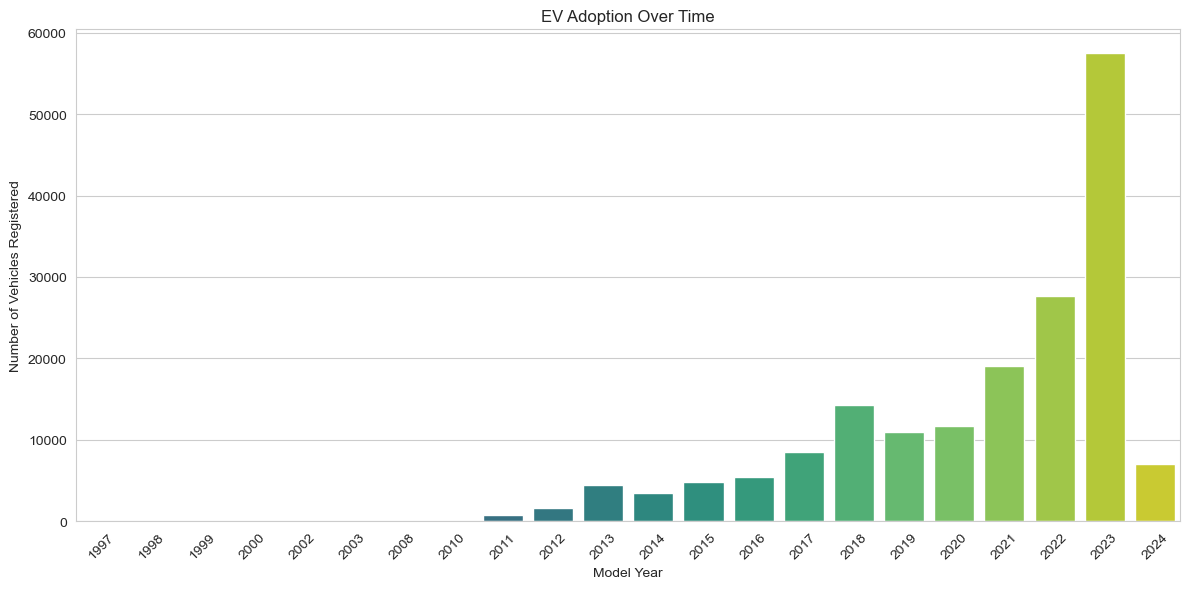

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
ev_adoption_by_year = data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:**

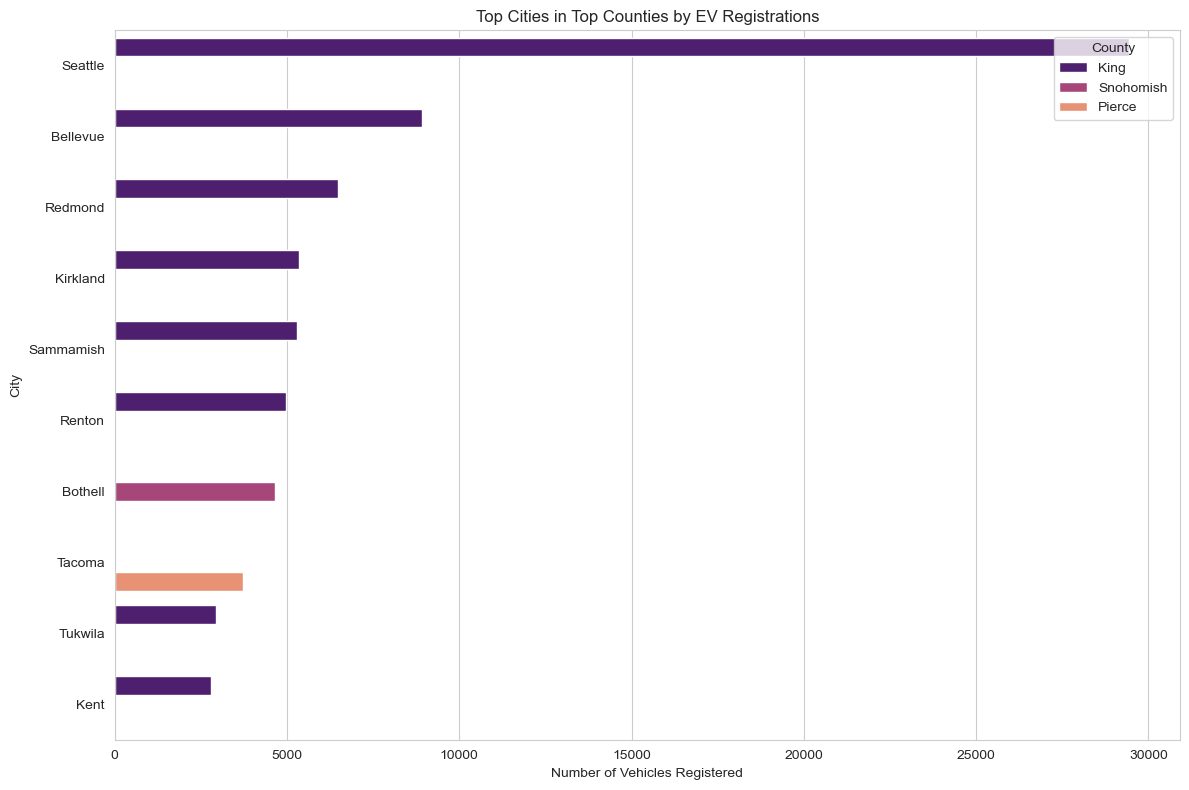

In [14]:
ev_county_distribution = data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = data[data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

Here's a summary of the key findings from the graph:

- Seattle has the highest number of registered electric vehicles, far exceeding other cities.
- Other King County cities like Bellevue and Redmond have moderate EV registrations, but much lower than Seattle.
- Snohomish County cities like Kirkland and Sammamish have some EV registrations, but less than the top King County cities.
- Pierce County cities Tacoma and Tukwila have the fewest EV registrations among the cities shown.
- The majority of the cities with high EV registrations are located in King County, indicating a concentration of EV adoption in that region.

Overall, the graph demonstrates that EV adoption is not evenly distributed across the cities and counties, with a clear dominance of EV registrations in Seattle and other King County areas.

**_____________________________________________________________________________________________________________________________________________**

**Okay, let's take a look at the breakdown of electric vehicle types in the dataset:**

- The main types are Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs).
- Visualizing the distribution of these EV types will show which are more popular among the registered vehicles.
- This can provide insights into consumer preferences and the adoption patterns of fully electric vs. hybrid electric solutions.

Analyzing the EV type distribution will give us a better understanding of the market composition and trends.

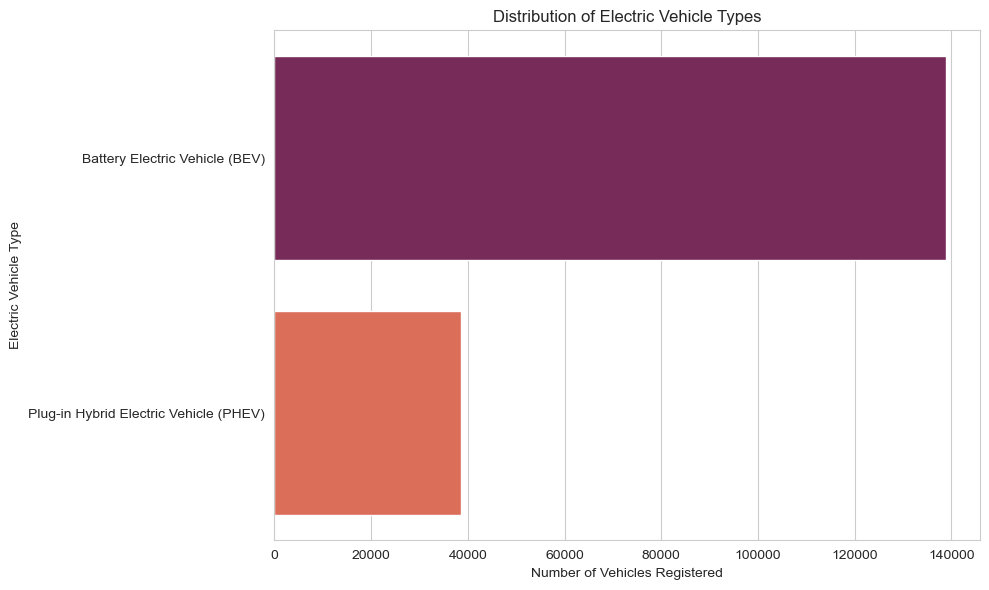

In [31]:
ev_type_distribution = data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

**The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.**

Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. This analysis will help us identify which manufacturers and specific models dominate the EV market, potentially indicating consumer preferences, brand loyalty, and the success of various manufacturers’ strategies in promoting electric mobility.

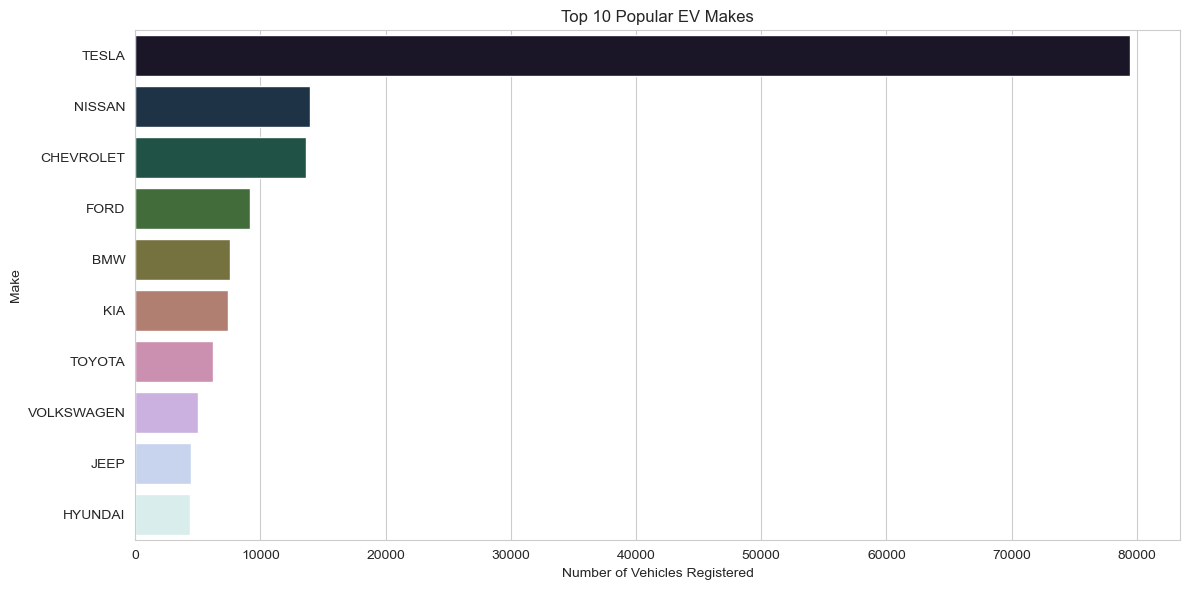

In [17]:
ev_make_distribution = data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

**The above chart shows that:**
- **TESLA** leads by a substantial margin with the highest number of vehicles registered.
- **NISSAN** is the second most popular manufacturer, followed by **CHEVROLET**, though both have significantly fewer registrations than TESLA.
- **FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI** follow in decreasing order of the number of registered vehicles.

**let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:**

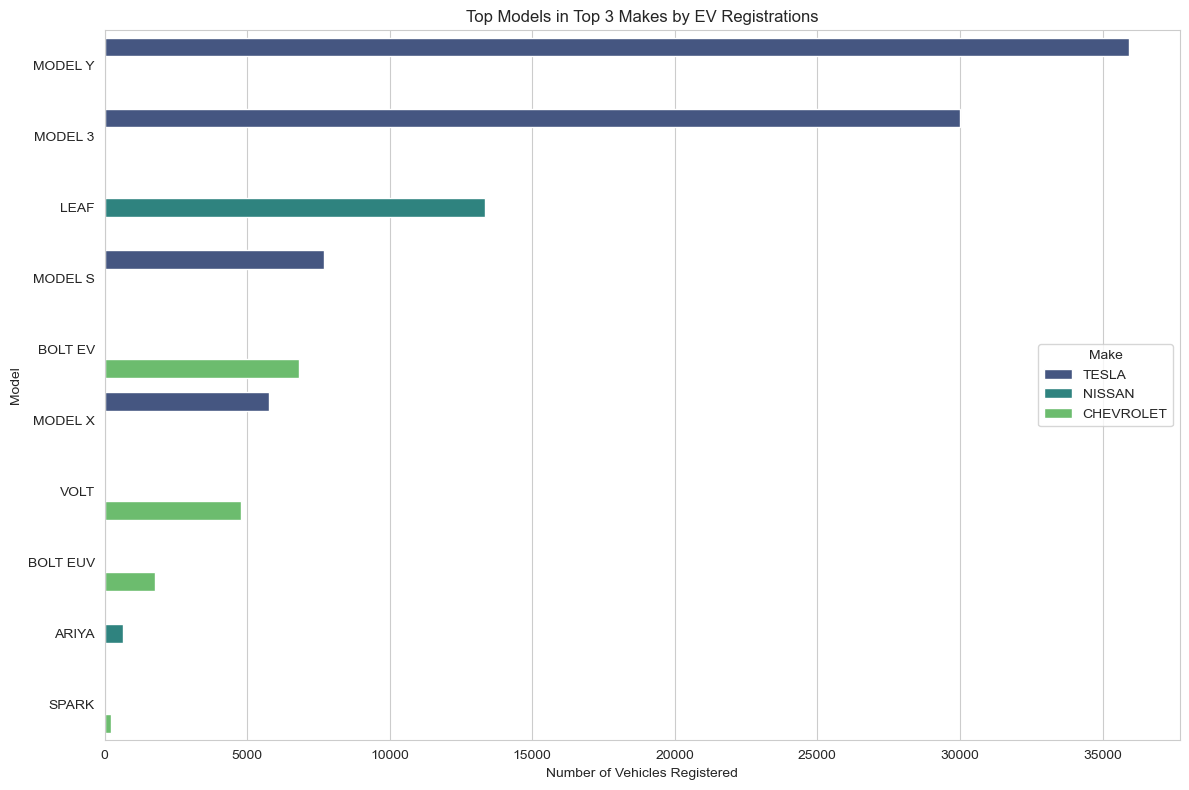

In [18]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = data[data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

**Key findings from the graph on EV model registrations:**

- Tesla's Model Y and Model 3 are the most registered models, with Model Y having the highest number.
- Nissan's Leaf is the third most registered model and the most popular non-Tesla vehicle.
- Tesla's Model S and Model X also have significant registrations.
- Chevrolet's Bolt EV and Volt have considerable registrations, followed by the Bolt EUV.
- Nissan's Ariya and Chevrolet's Spark have the lowest registrations among the models set size.

**Next, we'll analyze the electric range distribution to understand advancements in battery technology and how it impacts the EV market size.**

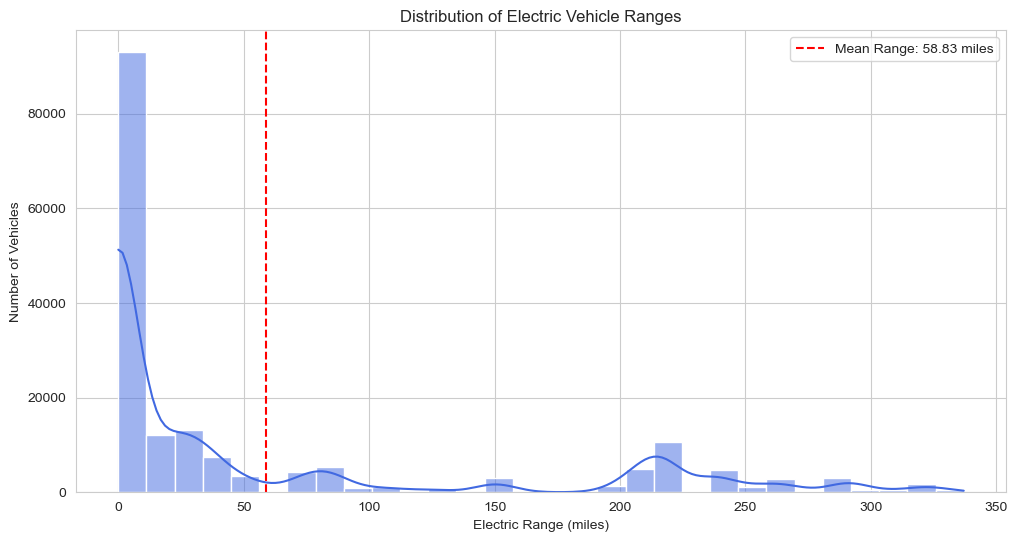

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

**Key points from the electric range analysis:**

- There is a high frequency of vehicles with low electric range, around 50 miles.
- The range distribution is skewed right, with a long tail towards higher ranges, but fewer vehicles have these higher ranges.
- The mean electric range is around 58.84 miles, which is relatively low compared to the highest ranges shown.
- While some EVs have ranges up to 350 miles, the majority have ranges below the mean.
- This suggests that while high-range EVs are available, the average range is still skewed lower due to a significant number of shorter-range veher time.

**Next, we'll look at the trend of electric ranges over model years to understand how advancements in battery technology have influenced the driving range capabilities of EVs over time.**

In [21]:
average_range_by_year = data.groupby('Model Year')['Electric Range'].mean().reset_index()

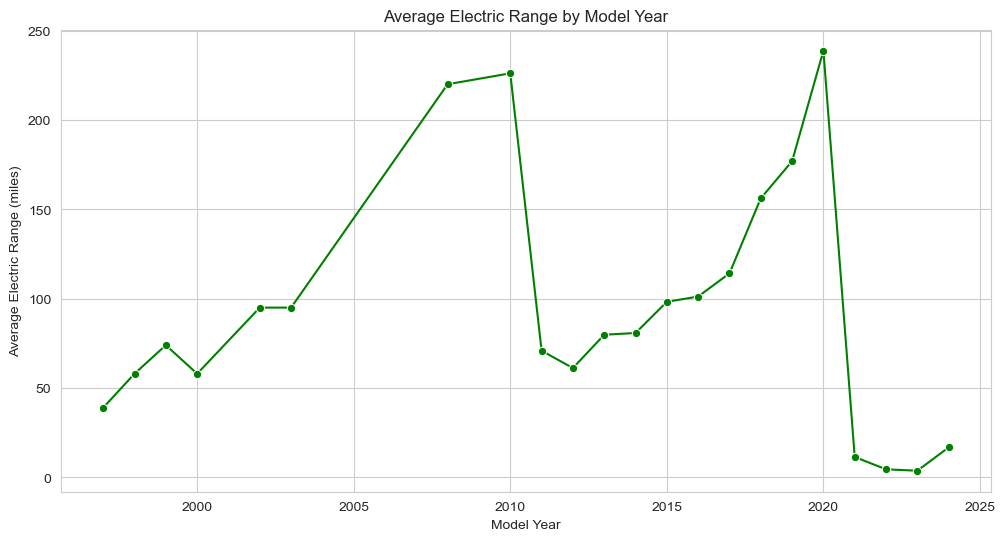

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

Key points from the electric range trend analysis:

- There is an overall upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
- The average range peaked around 2020, then dropped significantly, potentially due to incomplete data or the introduction of lower-range models.
- Recently, there has been a slight recovery in the average electric range.
- The data suggests that while there have been fluctuations, the long-term trend has been toward increasing the electric range of EVs.

Next, we'll explore how electric ranges vary across top manufacturers and models to see how they are addressing this crucial aspect of EV performance.

**Next, we'll explore how electric ranges vary across top manufacturers and models to see how they are addressing this crucial aspect of EV performance.**

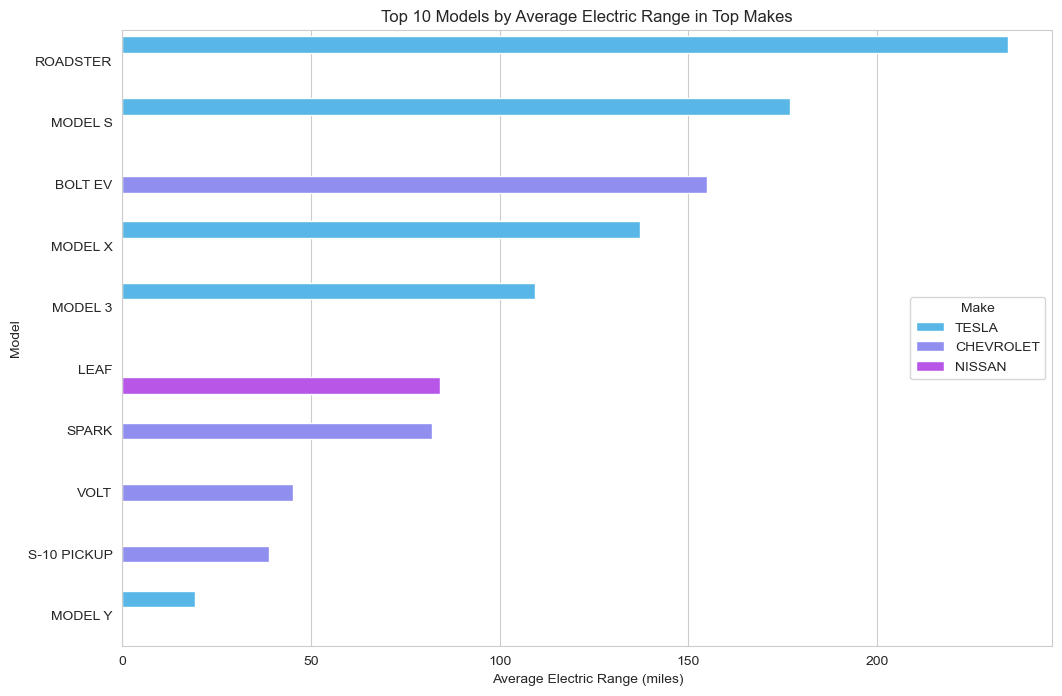

In [23]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

**The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.**

**Next, we'll explore Plot the distribution of EVs across different states:**

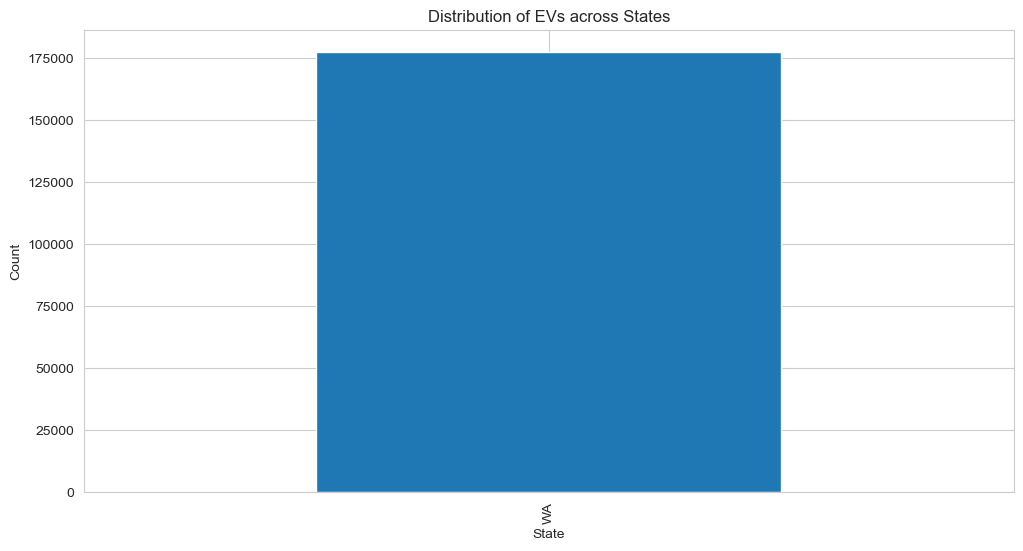

In [24]:
state_counts = data['State'].value_counts()
state_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of EVs across States')
plt.show()

**This bar chart that shows the count of EVs for each state and WA is only one state is include in this dataset**

**Next, we'll explore Analyze the market share of different EV models:**

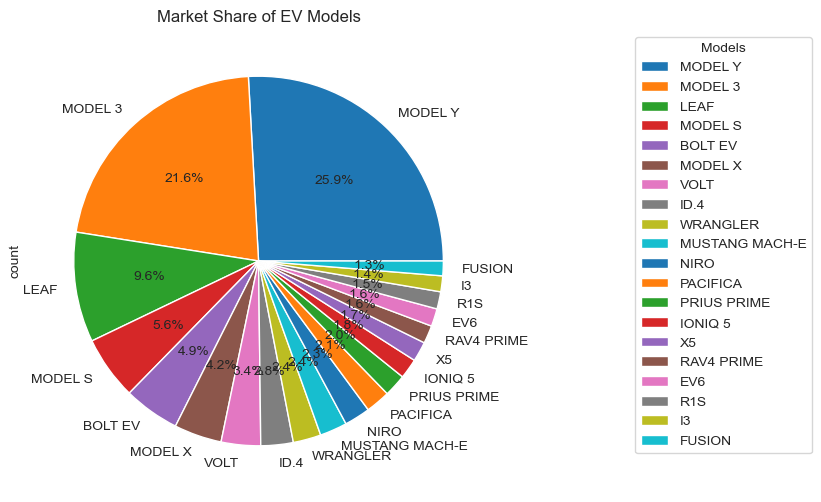

In [25]:
model_counts = data['Model'].value_counts().head(20)

model_counts.plot(kind='pie', figsize=(12, 6), autopct='%1.1f%%')
plt.title('Market Share of EV Models')
plt.legend(bbox_to_anchor=(1.30, 1), loc='upper left', title="Models")
plt.show()

**Next we'll 
Examine the characteristics of the most popular EV model**s

In [26]:
top_models = data['Model'].value_counts().head(5).index

top_model_data = data[data['Model'].isin(top_models)]
print(top_model_data[['Model', 'Electric Range', 'Base MSRP']].groupby('Model').describe())

        Electric Range                                                    \
                 count        mean         std  min    25%    50%    75%   
Model                                                                      
BOLT EV         6811.0  154.857143  118.038167  0.0    0.0  238.0  238.0   
LEAF           13352.0   84.148742   52.146092  0.0   73.0   84.0  107.0   
MODEL 3        30009.0  109.463028  121.471550  0.0    0.0    0.0  220.0   
MODEL S         7711.0  176.794449   99.056347  0.0  208.0  208.0  210.0   
MODEL Y        35921.0   19.191531   72.225799  0.0    0.0    0.0    0.0   

               Base MSRP                                                  \
           max     count          mean           std  min  25%  50%  75%   
Model                                                                      
BOLT EV  259.0    6811.0      0.000000      0.000000  0.0  0.0  0.0  0.0   
LEAF     215.0   13352.0      0.000000      0.000000  0.0  0.0  0.0  0.0   
MODEL 3  32

**This code first identifies the top 5 most popular EV models**
- Then filters the dataset to include only those models.
- It then prints a summary statistics table that shows the electric range and base MSRP for each of the top models.

**Know next we'll see Analyze the distribution of EVs across electric utilities:**

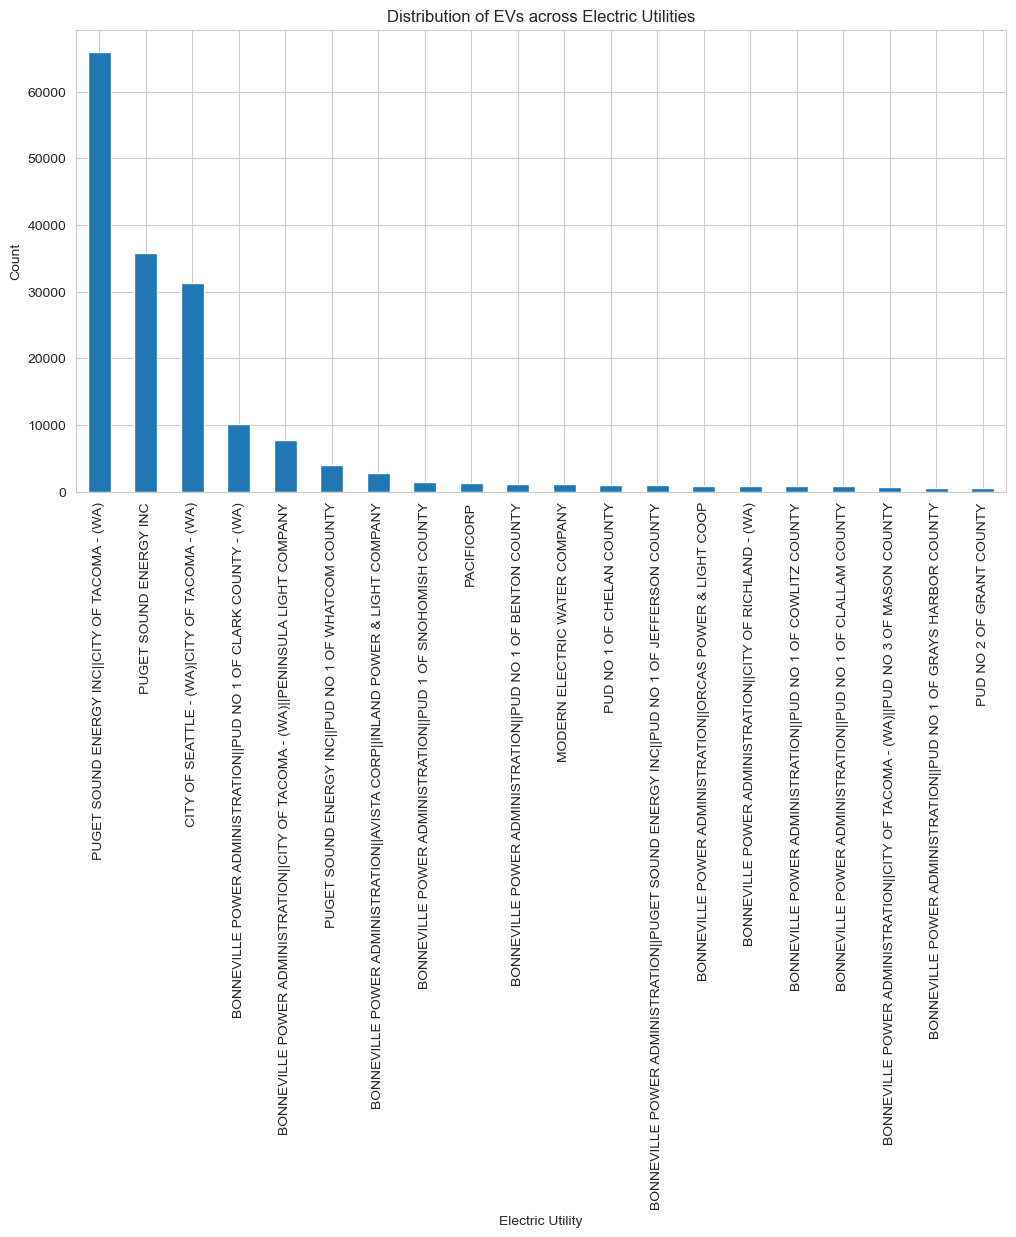

In [27]:
utility_counts = data['Electric Utility'].value_counts().head(20)

utility_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Electric Utility')
plt.ylabel('Count')
plt.title('Distribution of EVs across Electric Utilities')
plt.xticks(rotation=90)
plt.show()

**This code will create a bar chart that shows the number of EVs served by each electric utility in the dataset. This can help identify areas with potential needs for expanded charging infrastructure.**

### Estimated Market Size Analysis of Electric Vehicles in the United States:

**Now, let’s move forward towards finding the estimated market size of electric vehicles in the United States. I’ll first count the number of EVs registered every year:**

In [28]:
ev_registration_counts = data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

- In 2021, there were 19,063 EVs registered.
- In 2022, the number increased to 27708 EVs.
- In 2023, a significant jump to 57,519 EVs was observed.
- For 2024, currently, 7,072 EVs are registered, which suggests partial data..

**To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.**

**We’ll calculate the Compound Annual Growth Rate (CAGR) between a recent year with complete data (2023) and an earlier year to project the 2024 figures. Additionally, using this growth rate, we can estimate the market size for the next five years. Let’s proceed with these calculations:**

In [29]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


**Now, let’s plot the estimated market size data:**

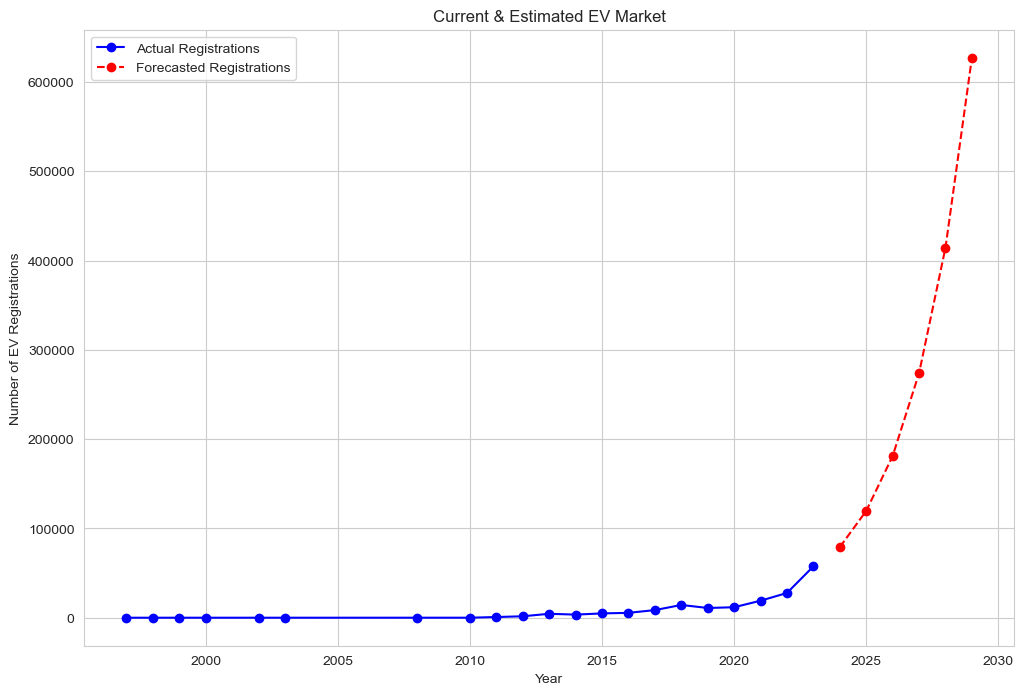

In [32]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

**From the above graph, we can see:**- The number of actual EV registrations remained relatively low and stable until around 2010, after which there was a consistent and steep upward trend, suggesting a significant increase in EV adoption.
The forecasted EV registrations predict an even more dramatic increase in the near future, with the number of registrations expected to rise sharply in the coming years.

## Given the growing trend in actual EV registrations and the projected acceleration as per the forecast data, we can conclude that the EV market size is expected to expand considerably. The steep increase in forecasted registrations suggests that consumer adoption of EVs is on the rise, and this trend is likely to continue. Overall, the data point towards a promising future for the EV industry, indicating a significant shift in consumer preferences and a potential increase in related investment and business opportunities.